<a href="https://colab.research.google.com/github/Alex193/UCI_dataset_Neural_Network/blob/main/UCI_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Activation, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn import model_selection

In [ ]:
my_epoch = 20
my_classes = 5
my_batch_size = 128
val_split = 0.2
#sgd = SGD(lr=0.01, nesterov=True);

In [ ]:
headers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num_the predicted attribute']
print(len(headers))
Data = pandas.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', sep=',', names=headers ,parse_dates=True, delim_whitespace=False)
#Data = Data.to_numpy
'''for names in headers:
  Data[names].replace('?',np.nan,inplace=True)'''
#Data = pandas.DataFrame(pandas.np.random.random(270))
Data = Data[~Data.isin(['?'])]
Data = Data.dropna(axis=0)       #выкидываем ряды с пропусками
Data = Data.apply(pandas.to_numeric)

#Data = Data.shuffle(100).repeat().batch(10)
#Data.shuffle(buffer_size=5).repeat().batch(3)
print (Data)

14
      age  sex   cp  trestbps  ...  slope   ca  thal  num_the predicted attribute
0    63.0  1.0  1.0     145.0  ...    3.0  0.0   6.0                            0
1    67.0  1.0  4.0     160.0  ...    2.0  3.0   3.0                            2
2    67.0  1.0  4.0     120.0  ...    2.0  2.0   7.0                            1
3    37.0  1.0  3.0     130.0  ...    3.0  0.0   3.0                            0
4    41.0  0.0  2.0     130.0  ...    1.0  0.0   3.0                            0
..    ...  ...  ...       ...  ...    ...  ...   ...                          ...
297  57.0  0.0  4.0     140.0  ...    2.0  0.0   7.0                            1
298  45.0  1.0  1.0     110.0  ...    2.0  0.0   7.0                            1
299  68.0  1.0  4.0     144.0  ...    2.0  2.0   7.0                            2
300  57.0  1.0  4.0     130.0  ...    2.0  1.0   7.0                            3
301  57.0  0.0  2.0     130.0  ...    2.0  1.0   3.0                            1

[297 rows x 

In [ ]:
#если нам надо будет нормировать данные, сделаем это здесь
# Normalize data

x = Data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Data = pandas.DataFrame(x_scaled)
Data = shuffle(Data)
print (Data)

           0    1         2         3   ...   10        11    12    13
138  0.458333  1.0  0.666667  0.292453  ...  0.5  0.000000  0.00  0.00
36   0.291667  1.0  1.000000  0.245283  ...  0.5  0.000000  1.00  0.75
132  0.458333  1.0  1.000000  0.433962  ...  0.0  0.000000  0.00  0.00
47   0.437500  1.0  1.000000  0.528302  ...  0.5  0.000000  1.00  1.00
117  0.708333  1.0  1.000000  0.339623  ...  0.0  1.000000  1.00  0.75
..        ...  ...       ...       ...  ...  ...       ...   ...   ...
73   0.750000  1.0  1.000000  0.150943  ...  0.0  0.666667  0.75  0.25
160  1.000000  1.0  1.000000  0.292453  ...  0.0  1.000000  0.00  1.00
296  0.583333  0.0  0.333333  0.339623  ...  0.5  0.333333  0.00  0.25
203  0.604167  1.0  1.000000  0.320755  ...  0.5  0.666667  1.00  0.75
131  0.000000  1.0  0.333333  0.339623  ...  0.0  0.000000  0.00  0.00

[297 rows x 14 columns]


In [ ]:
#берем из датасета столбцы и гоним в numpy.ndarray, как в keras
rows_num = len(Data.index) 
columns_num = len(Data.columns)
x_train = Data.iloc[:260, :13].to_numpy()
print(x_train)
y_train = Data.iloc[:260, 13:].to_numpy().reshape(-1)
print(y_train)

x_test = Data.iloc[260:, :13].to_numpy()
print(x_test)
y_test = Data.iloc[260:, 13:].to_numpy().reshape(-1)
print(y_test)

[[0.45833333 1.         0.66666667 ... 0.5        0.         0.        ]
 [0.29166667 1.         1.         ... 0.5        0.         1.        ]
 [0.45833333 1.         1.         ... 0.         0.         0.        ]
 ...
 [0.47916667 0.         0.66666667 ... 0.5        0.         0.        ]
 [0.79166667 0.         0.66666667 ... 0.         0.33333333 0.        ]
 [0.64583333 0.         1.         ... 0.5        0.66666667 1.        ]]
[0.   0.75 0.   1.   0.75 0.5  0.   0.75 0.25 0.5  0.   0.   0.75 0.25
 0.   0.   0.   0.25 0.25 0.   0.5  0.75 0.5  0.   0.   0.   0.75 0.5
 0.25 0.75 0.5  0.   0.25 0.75 1.   0.   0.5  0.   0.   0.   0.5  0.
 0.   0.   0.   0.   0.5  0.   0.5  0.75 0.5  0.75 0.   0.25 0.5  0.
 0.   0.25 0.75 0.   0.5  0.25 0.5  0.   0.   0.25 1.   0.   0.25 0.
 1.   0.   0.   0.25 0.   0.5  0.   0.75 0.   0.25 0.   0.   0.   0.
 0.   0.5  0.   0.   0.   0.5  0.5  0.25 0.25 0.   0.   0.25 0.75 0.25
 0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   1.   0.   0.75 0.

In [ ]:
x_train = x_train.astype('float32')#работаем с float
x_test = x_test.astype('float32')

y_train = np_utils.to_categorical(y_train, my_classes)
y_test = np_utils.to_categorical(y_test, my_classes)
print(x_train)
print(x_test)

[[0.45833334 1.         0.6666667  ... 0.5        0.         0.        ]
 [0.29166666 1.         1.         ... 0.5        0.         1.        ]
 [0.45833334 1.         1.         ... 0.         0.         0.        ]
 ...
 [0.47916666 0.         0.6666667  ... 0.5        0.         0.        ]
 [0.7916667  0.         0.6666667  ... 0.         0.33333334 0.        ]
 [0.6458333  0.         1.         ... 0.5        0.6666667  1.        ]]
[[0.45833334 1.         1.         0.43396226 0.39497718 0.
  0.         0.77862597 1.         0.2580645  0.         0.
  1.        ]
 [0.45833334 0.         0.6666667  0.24528302 0.38584474 0.
  1.         0.65648854 0.         0.09677419 0.         0.
  0.        ]
 [0.125      1.         1.         0.3018868  0.3561644  0.
  1.         0.648855   1.         0.         0.         0.
  1.        ]
 [0.6875     0.         1.         0.28301886 0.18949772 0.
  0.         0.70229006 0.         0.         0.         0.
  0.        ]
 [0.7291667  1.     

In [ ]:
UCImodel = Sequential()
UCImodel.add(Dense(32, input_shape = (13, )))
UCImodel.add(Activation ('relu'))
#UCImodel.add(Dropout(0.1))

UCImodel.add(Dense(32))
UCImodel.add(Activation ('relu'))
UCImodel.add(Dropout(0.1))

UCImodel.add(Dense(16))
UCImodel.add(Activation ('relu'))
#UCImodel.add(Dropout(0.1))


UCImodel.add(Dense(my_classes))
UCImodel.add(Activation ('softmax'))
UCImodel.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

In [ ]:
UCImodel.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'],
                 )
history = UCImodel.fit(x_train,
                    y_train,
                    batch_size = my_batch_size,
                    epochs = my_epoch,
                    validation_split=0.3)
                   #shuffle=True)

Epoch 1/20
2/2 [==============================] - 0s 95ms/step - loss: 1.6640 - accuracy: 0.0604 - val_loss: 1.6117 - val_accuracy: 0.0513
Epoch 2/20
2/2 [==============================] - 0s 11ms/step - loss: 1.6077 - accuracy: 0.1209 - val_loss: 1.5458 - val_accuracy: 0.1538
Epoch 3/20
2/2 [==============================] - 0s 11ms/step - loss: 1.5333 - accuracy: 0.2363 - val_loss: 1.4842 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 0s 10ms/step - loss: 1.4717 - accuracy: 0.4725 - val_loss: 1.4265 - val_accuracy: 0.6282
Epoch 5/20
2/2 [==============================] - 0s 11ms/step - loss: 1.4217 - accuracy: 0.6703 - val_loss: 1.3715 - val_accuracy: 0.8590
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 1.3618 - accuracy: 0.8462 - val_loss: 1.3188 - val_accuracy: 0.9615
Epoch 7/20
2/2 [==============================] - 0s 10ms/step - loss: 1.3122 - accuracy: 0.9176 - val_loss: 1.2682 - val_accuracy: 0.9615
Epoch 8/20
2/2 [===========

In [ ]:
print("Testing")
score = UCImodel.evaluate(x_test,y_test,batch_size = my_batch_size,verbose = 1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing
1/1 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.9459

Test score: 0.5401018261909485
Test accuracy: 0.9459459185600281


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


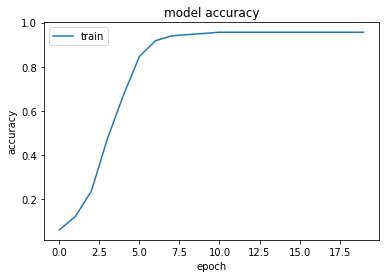

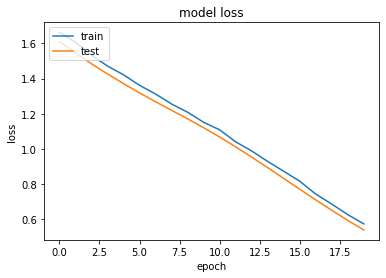

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()